<a href="https://colab.research.google.com/github/alexandreherculano/kNN-class-especies_flores/blob/main/Classifica%C3%A7%C3%A3o_de_esp%C3%A9cies_flores_%C3%8Dres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
#importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#definir dataset
iris = pd.read_csv('/content/drive/My Drive/csv/IRIS.csv')

In [203]:
#análise exploratória - top 5
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [204]:
#análise exploratória - sumário estatístico
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [205]:
#quantitativo de espécies por classe
iris['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [206]:
#matriz de correlação
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


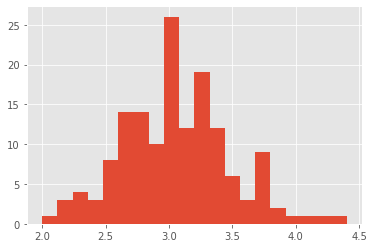

In [207]:
plt.style.use('ggplot')
iris['sepal_width'].hist(bins=20)
plt.show()

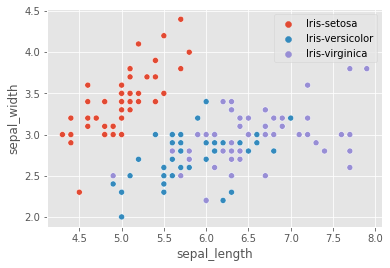

In [208]:
sb.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.legend(loc='upper right')

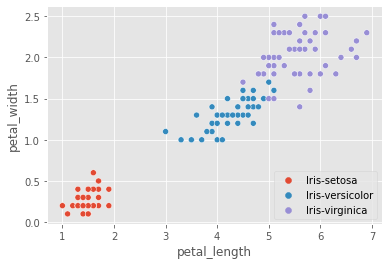

In [209]:
sb.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.legend(loc='lower right')

In [210]:
X = iris[['petal_length','petal_width']]
y = iris['species']

In [211]:
#avaliação do melhor hiperparâmetro k - GridSearchCV
from sklearn.model_selection import GridSearchCV
knn_test = KNeighborsClassifier()
#criação de dicionário com valores de k 
dict_k = {'n_neighbors' : np.arange(2,10)}
#teste de melhor hiperparâmetro k
teste_k = GridSearchCV(knn_test, dict_k, cv=5)
#ajuste de teste ao dataset
teste_k.fit(X, y)
#melhor k
teste_k.best_params_

{'n_neighbors': 4}

In [212]:
#variáveis de entrada
X = iris[['petal_length','petal_width']]
#alvo da classificação
y = iris['species']
#divisão de amostra e treinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#importação e definição de modelo kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
#ajuste de modelo kNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [213]:
#classificação do conjunto de teste
pred = knn.predict(X_test)
pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [214]:
#probabilidade de classificação - top 15
y_pred_prob = knn.predict_proba(X_test)
pd.DataFrame(y_pred_prob[:15]*100, columns=y.unique())

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.0,0.0,100.0
1,100.0,0.0,0.0
2,100.0,0.0,0.0
3,0.0,100.0,0.0
4,0.0,100.0,0.0
5,0.0,100.0,0.0
6,0.0,0.0,100.0
7,0.0,100.0,0.0
8,0.0,0.0,100.0
9,100.0,0.0,0.0


In [215]:
#avaliação da classificação - acurácia
from sklearn.metrics import accuracy_score
knn.score(X_test, y_test)

0.9777777777777777

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


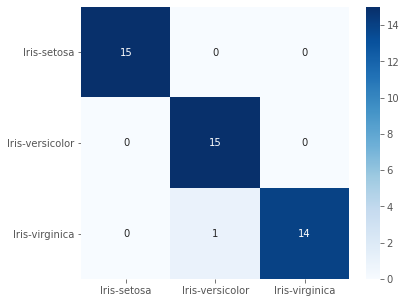

In [216]:
#avaliação da classificação - matriz de confusão
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred, labels=y.unique()))
#avaliação da classificação - plot - matriz de confusão
plt.figure(figsize=(6,5))
h = sb.heatmap(confusion_matrix(y_test, pred), yticklabels = np.unique(y_test), xticklabels = np.unique(y_test), cmap='Blues', annot=True)
h.set_yticklabels(np.unique(y_test), rotation=0)
plt.show()

In [219]:
#avaliação da classificação - validação cruzada(k-fold)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)
cv_scores.mean()

0.9666666666666668